<a href="https://colab.research.google.com/github/patriciaapenat/TFM/blob/main/Gr%C3%A1ficos/Data_Frame_uci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clonación del Repositorio GitHub de **TFM**

---



In [2]:
! git clone https://github.com/patriciaapenat/TFM.git

Cloning into 'TFM'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 325 (delta 11), reused 1 (delta 1), pack-reused 307
Receiving objects: 100% (325/325), 17.27 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (174/174), done.


Importo algunas librerias de pandas

In [17]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

#!pip install plotly==4.14.3

##Visualización dinámica
Instalación/carga librerías/datos utilizados

# Acceso al dataSet de Vacunación **df_UCI**



In [6]:
df_uci =pd.read_csv ('/content/TFM/Ficheros_Depurados/df_hosp_UCI_NEW.csv')

df_uci.head(10)

,PAIS_ISO3,PAIS_NOM,INDICADOR,FECHA,ANY_SEMANA,VALOR,FUENTE_ORIGEN
0,AUT,Austria,Daily hospital occupancy,01-04-2020,2020-14,856.0,Country_Website
1,AUT,Austria,Daily hospital occupancy,02-04-2020,2020-14,823.0,Country_Website
2,AUT,Austria,Daily hospital occupancy,03-04-2020,2020-14,829.0,Country_Website
3,AUT,Austria,Daily hospital occupancy,04-04-2020,2020-14,826.0,Country_Website
4,AUT,Austria,Daily hospital occupancy,05-04-2020,2020-14,712.0,Country_Website
5,AUT,Austria,Daily hospital occupancy,06-04-2020,2020-15,824.0,Country_Website
6,AUT,Austria,Daily hospital occupancy,07-04-2020,2020-15,857.0,Country_Website
7,AUT,Austria,Daily hospital occupancy,08-04-2020,2020-15,829.0,Country_Website
8,AUT,Austria,Daily hospital occupancy,09-04-2020,2020-15,820.0,Country_Website
9,AUT,Austria,Daily hospital occupancy,10-04-2020,2020-15,771.0,Country_Website


In [7]:
df_uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27633 entries, 0 to 27632
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PAIS_ISO3      27633 non-null  object 
 1   PAIS_NOM       27633 non-null  object 
 2   INDICADOR      27633 non-null  object 
 3   FECHA          27633 non-null  object 
 4   ANY_SEMANA     27633 non-null  object 
 5   VALOR          27633 non-null  float64
 6   FUENTE_ORIGEN  27633 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.5+ MB


**Matplot**

Gráfico de **pastel** con la distribución de hospitalizaciones por paises. Para esto se agrupan los casos nuevos reportados a la fecha por pais y luego se procede a graficar.

In [14]:

df_uci.groupby(["PAIS_NOM"]).sum()["VALOR"]

<ipython-input-14-dfbc7313479d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_uci.groupby(["PAIS_NOM"]).sum()["VALOR"]


PAIS_NOM
Austria          1.422151e+06
Belgium          2.396027e+06
Bulgaria         4.402420e+05
Cyprus           9.799950e+04
Czechia          2.538223e+06
Estonia          2.419194e+05
France           3.278959e+06
Germany          3.014856e+05
Greece           2.390212e+03
Hungary          1.218907e+01
Iceland          2.899683e+02
Ireland          7.706233e+04
Italy            1.462523e+03
Latvia           9.063353e+03
Liechtenstein    2.385672e+03
Lithuania        4.237678e+05
Luxembourg       7.109153e+04
Malta            1.342567e+03
Netherlands      1.697668e+05
Portugal         1.245629e+03
Romania          3.483916e+06
Slovakia         1.275705e+06
Slovenia         4.406577e+05
Spain            4.186062e+06
Sweden           9.035309e+01
Name: VALOR, dtype: float64

<ipython-input-18-a320b2dbf7ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.pie(df_uci.groupby(["PAIS_NOM"]).sum()["VALOR"], labels=df_uci.groupby(["PAIS_NOM"]).sum().index)
<ipython-input-18-a320b2dbf7ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.pie(df_uci.groupby(["PAIS_NOM"]).sum()["VALOR"], labels=df_uci.groupby(["PAIS_NOM"]).sum().index)


([<matplotlib.patches.Wedge at 0x7d3b0ed39f90>,
 [Text(1.0748738036349332, 0.23376549415893558, 'Austria'),
  Text(0.7749426862303368, 0.780681646420684, 'Belgium'),
  Text(0.3819619500460955, 1.031554685277026, 'Bulgaria'),
  Text(0.2971939112419447, 1.0590919597092197, 'Cyprus'),
  Text(-0.1353799843158262, 1.0916374214209803, 'Czechia'),
  Text(-0.5674529731256848, 0.9423359927811423, 'Estonia'),
  Text(-0.9660756326308084, 0.5260207904988009, 'France'),
  Text(-1.099096316908115, -0.04457898786443083, 'Germany'),
  Text(-1.0959067862494714, -0.09480672894028062, 'Greece'),
  Text(-1.0958724179277837, -0.0952031702471771, 'Hungary'),
  Text(-1.0958680851657032, -0.09525303100298195, 'Iceland'),
  Text(-1.0946842960912362, -0.10801061008639358, 'Ireland'),
  Text(-1.0933306567459238, -0.1209465791972925, 'Italy'),
  Text(-1.0931375851727354, -0.12267933763564645, 'Latvia'),
  Text(-1.0929244627009291, -0.12456371393742931, 'Liechtenstein'),
  Text(-1.0826872372112828, -0.194392248764

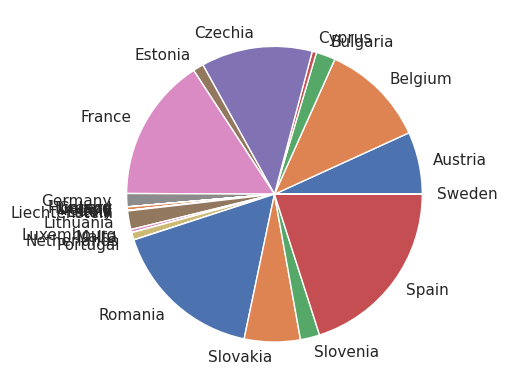

In [18]:
plt.pie(df_uci.groupby(["PAIS_NOM"]).sum()["VALOR"], labels=df_uci.groupby(["PAIS_NOM"]).sum().index)

Gráfico de líneas con tendencia de casos uci en España. Para esto se filtra el df para obtener los registros de España exclusivamente, luego se procede a graficar.

In [21]:
df_Spain=df_uci[df_uci["PAIS_NOM"].str.contains("Spain")]
df_Spain

,PAIS_ISO3,PAIS_NOM,INDICADOR,FECHA,ANY_SEMANA,VALOR,FUENTE_ORIGEN
26525,ESP,Spain,Daily hospital occupancy,20-08-2020,2020-34,4636.000000,Surveillance
26526,ESP,Spain,Daily hospital occupancy,21-08-2020,2020-34,4703.000000,Surveillance
26527,ESP,Spain,Daily hospital occupancy,24-08-2020,2020-35,5484.000000,Surveillance
26528,ESP,Spain,Daily hospital occupancy,25-08-2020,2020-35,5688.000000,Surveillance
26529,ESP,Spain,Daily hospital occupancy,26-08-2020,2020-35,5903.000000,Surveillance
...,...,...,...,...,...,...,...
27456,ESP,Spain,Weekly new ICU admissions per 100k,21-05-2023,2023-20,0.101196,TESSy NCOVAGGR
27457,ESP,Spain,Weekly new ICU admissions per 100k,28-05-2023,2023-21,0.128603,TESSy NCOVAGGR
27458,ESP,Spain,Weekly new ICU admissions per 100k,04-06-2023,2023-22,0.109629,TESSy NCOVAGGR
27459,ESP,Spain,Weekly new ICU admissions per 100k,11-06-2023,2023-23,0.071680,TESSy NCOVAGGR


<Axes: xlabel='ANY_SEMANA', ylabel='VALOR'>

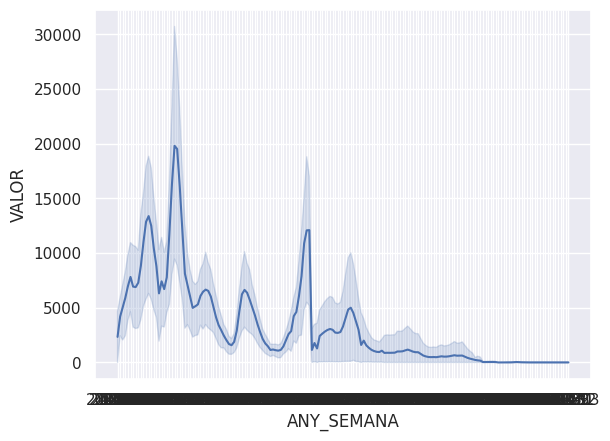

In [22]:
sns.lineplot(data=df_Spain,x="ANY_SEMANA",y="VALOR")

Top 10 de paises con indicador mayor cantidad de uci TRATAR DE HACER



In [ ]:
#Creamos una Pivot table que sume todas las vacunaciones por Paises del Continente Asiatico
df_vacunation_continente_asia=df_vacunation[df_vacunation['CONTINENTE']== "Asia"]
df_vacunation_continente_asia_top10 = df_vacunation_continente_asia.sort_values('NPER_VACUNADAS_DOSIS_FULL', ascending=False).head(10)

df_vacunation_continente_asia_top10 = pd.pivot_table(
    df_vacunation_continente_asia_top10,
    values = 'NPER_VACUNADAS_DOSIS_FULL',
    index = ['PAIS'],
    aggfunc=sum,
    fill_value=0
    ).sort_values(by='NPER_VACUNADAS_DOSIS_FULL', ascending=True)

#Cambiamos el nombre de la columna New test a Pruebas
df_vacunation_continente_asia_top10 = df_vacunation_continente_asia_top10.rename(columns={ 'NPER_VACUNADAS_DOSIS_FULL':'TOTAL VACUNACIONES DOSIS COMPLETA' })
df_vacunation_continente_asia_top10.head(10)


,TOTAL VACUNACIONES DOSIS COMPLETA
PAIS,
Thailand,54181443
Iran (Islamic Republic of),58575727
Philippines,78443972
Viet Nam,85958364
Japan,103392920
Pakistan,140466099
Bangladesh,141208849
Indonesia,174893201
India,952120865


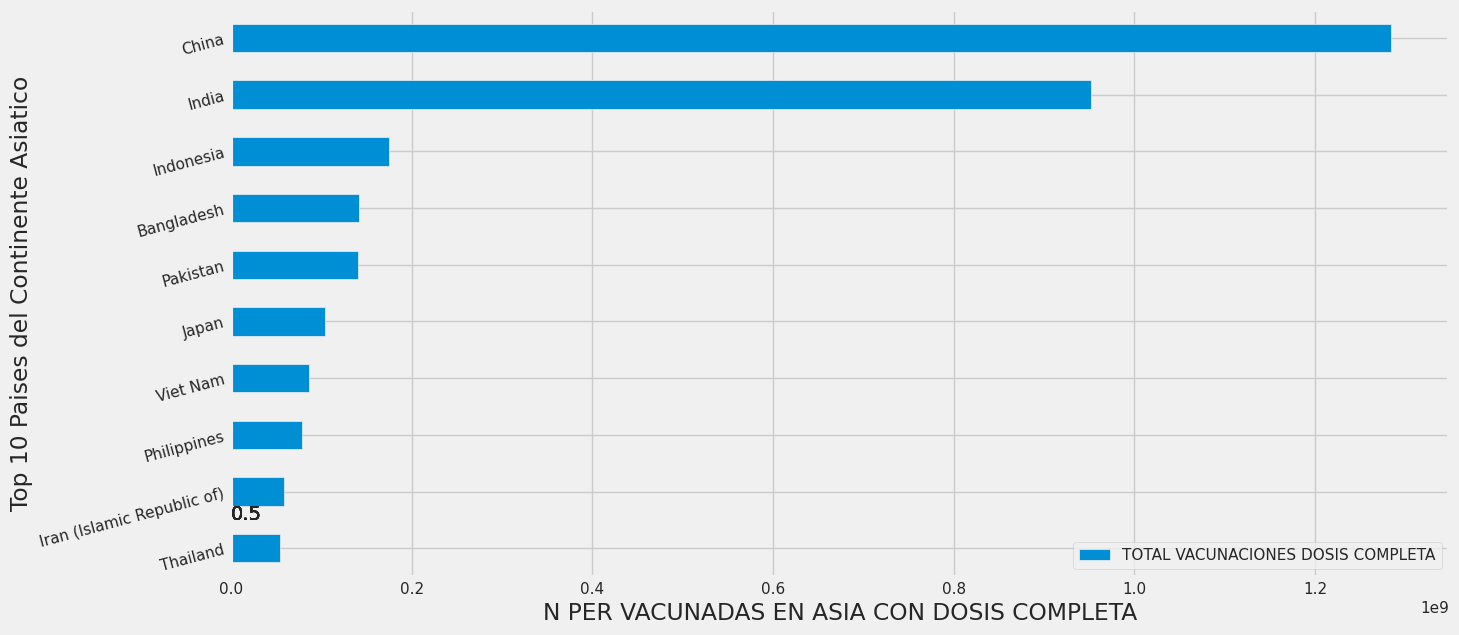

In [ ]:
#Obtenemos los datos de la pivot table y obtenemos Gráfico
axes = df_vacunation_continente_asia_top10.plot(kind='barh', rot=15)
#Leyendas en los ejes
axes.set_xlabel('N PER VACUNADAS EN ASIA CON DOSIS COMPLETA')
axes.set_ylabel('Top 10 Paises del Continente Asiatico')

fig = axes.get_figure()
#Cambiamos tamaño de gráfica
fig.set_size_inches(14,7)

#Iteramos en cada barra para pintar sus valores en la gráfica
for barh in axes.patches:
    axes.annotate(
      "{:,}".format( barh.get_height() ),
      (barh.get_x() * 1.0005, barh.get_height() * 1.005)
    )

**Plotly**

Top 10 Paises con Total de Vacunaciones

In [ ]:
df_vacunation_paises_top10 = df_vacunation[['PAIS','NPER_VACUNADAS_DOSIS_FULL']].sort_values(by=['NPER_VACUNADAS_DOSIS_FULL'],ascending=False).head(10)
fig = px.bar(df_vacunation_paises_top10, x='NPER_VACUNADAS_DOSIS_FULL', y='PAIS', color='PAIS', title='Top 10 Paises con mayor Vacunación')
fig.show()

Top 10 Paises con menor Vacunación

In [ ]:
df_vacunation_paises_button10 = df_vacunation[['PAIS','NPER_VACUNADAS_DOSIS_FULL']].sort_values(by=['NPER_VACUNADAS_DOSIS_FULL'],ascending=False).tail(10)
fig = px.bar(df_vacunation_paises_button10, x='NPER_VACUNADAS_DOSIS_FULL', y='PAIS',color ='PAIS', title='Top 10 Paises con menor Vacunación con Dosis Completa')
fig.show()

In [ ]:
fig_recovered = px.bar(df_vacunation, x = "CONTINENTE", y = "NPER_VACUNADAS_DOSIS_FULL_PER100", color = "CONTINENTE", title = "Total de Personas Vacunadas por cada 100 habitantes")
fig_recovered.show()

Tipos de Vacunación

Tipos de Vacunas utilizadas en más paises

In [ ]:
df_vacunation_tipo =pd.read_csv ('/content/TFM/Ficheros_Depurados/df_vacunation_tipo.csv')

df_vacunation_tipo.head(10)

,PAIS_ISO3,CONTINENTE,ISO_continente,NOMBRE_VACUNA,NOMBRE_TIPO_VACUNA,NOMBRE_COMPAÑIA,FECHA_AUTORIZACION,FECHA_INICIO_VACUNACION,FUENTE_DATOS
0,SHN,Africa,AF,AstraZeneca - AZD1222,AZD1222,AstraZeneca,0,0,OWID
1,GRL,North America,NaN,Moderna - mRNA-1273,mRNA-1273,Moderna,0,0,OWID
2,FRO,Europe,EU,Moderna - mRNA-1273,mRNA-1273,Moderna,0,0,OWID
3,FRO,Europe,EU,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,0,0,OWID
4,BIH,Europe,EU,AstraZeneca - AZD1222,AZD1222,AstraZeneca,0,0,OWID
5,BIH,Europe,EU,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,0,0,OWID
6,BIH,Europe,EU,Sinovac - CoronaVac,Coronavac,Sinovac,0,0,OWID
7,JEY,Europe,EU,Moderna - mRNA-1273,mRNA-1273,Moderna,0,0,OWID
8,JEY,Europe,EU,AstraZeneca - AZD1222,AZD1222,AstraZeneca,0,0,OWID
9,JEY,Europe,EU,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,0,0,OWID


In [ ]:
number_of_vaccines = df_vacunation_tipo.groupby('NOMBRE_COMPAÑIA')['PAIS_ISO3'].nunique()

<Axes: ylabel='NOMBRE_COMPAÑIA'>

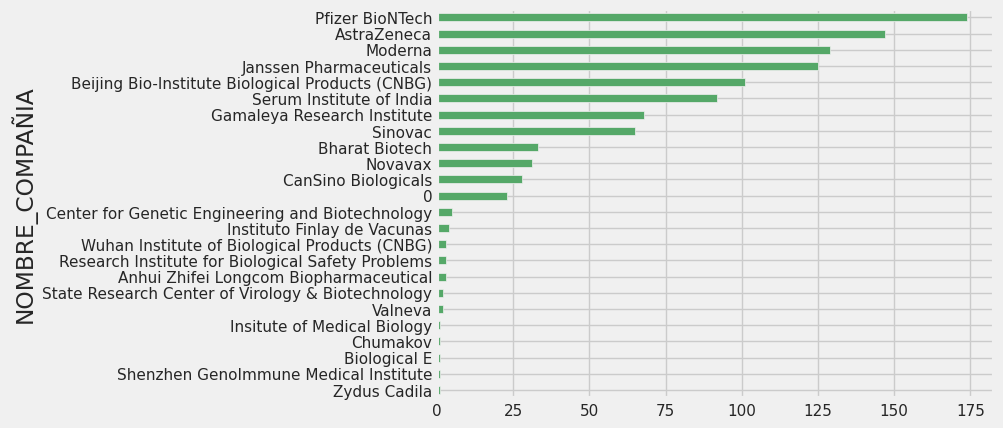

In [ ]:
number_of_vaccines.sort_values(ascending=True).plot(kind="barh", color="g")